# Compute RBS homology

In [2]:
import oatpy as oat

import copy
import plotly.graph_objects as go
import numpy as np
import networkx as nx
import hypernetx as hnx
import sklearn

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


# Define a hypergraph

In [3]:
# define a hypergraph

E = { "A": ["x"], "B": ["y"], "C": ["x","y","z",], "D": ["x","y","w",], }

# Plot

### Initial hypergraph

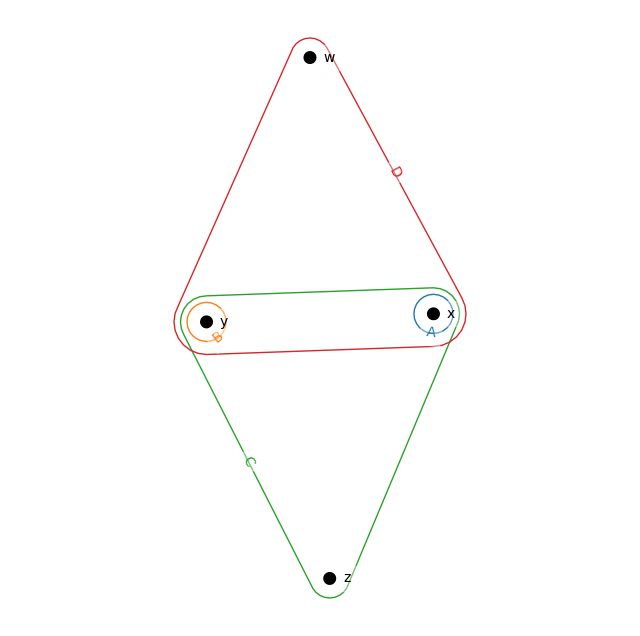

In [4]:
hnxgraph = hnx.Hypergraph(E)
hnx.drawing.draw(hnxgraph)

# Compute homology

In [5]:
# convert to a list of edges
G                           =   list( E.values() )
# graph representing the edge containment poset (forgetting direction)
containment                 =   oat.hypergraph.edge_containment_graph_symmetrized( G )
# graph whose edges form the set complement of the containment graph
anticontainment             =   nx.complement( containment )
# adjacency matrix of the anticontainment graph
anti_adjacency              =   nx.adjacency_matrix( anticontainment ).todense()
dissimilarity_matrtix       =   oat.dissimilarity.matrix_from_dense(
                                    dissimilarity_matrix    =   anti_adjacency,
                                    dissimilarity_max       =   0.5
                                )

# factored boundary matrix
factored                    =   oat.rust.FactoredBoundaryMatrixVr(
                                    dissimilarity_matrix    =   dissimilarity_matrtix,
                                    homology_dimension_max  =   1, 
                                )

/var/folders/n0/_16lj8n53ll89wcvhx1t4g4w0000gn/T/ipykernel_15613/2554264007.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  anti_adjacency              =   nx.adjacency_matrix( anticontainment ).todense()


In [6]:
homology        =   factored.homology(
                        return_cycle_representatives    =   True,
                        return_bounding_chains          =   True,
                    )
homology

dimension  birth  death birth simplex death simplex  \
id                                                        
0           0    0.0    inf           [0]          None   
1           1    0.0    inf        [1, 3]          None   

                                 cycle representative  cycle nnz  \
id                                                                 
0     simplex  filtration coefficient
0     [0]   ...          1   
1     simplex  filtration coefficient
0  [1, 3]   ...          4   

   bounding chain bounding nnz  
id                              
0            None         None  
1            None         None

# Inspect a cycle representative

In [7]:
cycle           =   homology["cycle representative"][1]
cycle

simplex  filtration coefficient
0  [1, 3]         0.0           1
1  [1, 2]         0.0          -1
2  [0, 3]         0.0          -1
3  [0, 2]         0.0           1

### Relabel each vertex with an edge

Recall that each vertex in RBS homology represents an edge in the reduced hypergraph (which corresponds to a set of hyperedges in the initial hypergraph).  Here we relabel each vertex with **one** of the edges that maps to it.

In [8]:

remap = { p: k for p,k in enumerate(E.keys()) }

cycle               =   copy.deepcopy(homology["cycle representative"][1])
cycle["simplex"]    =   [ [remap[x] for x in simplex] for simplex in cycle["simplex"] ]

cycle

simplex  filtration coefficient
0  [B, D]         0.0           1
1  [B, C]         0.0          -1
2  [A, D]         0.0          -1
3  [A, C]         0.0           1

# Plot a cycle representative

In [9]:
edges   =   homology["cycle representative"][1]["simplex"] # the edges in the cycle
coo     =   oat.plot.hop_mds_from_simplices( edges.tolist() ) # coordinates generated by MDS

data    =   []
for edge in edges:
    trace   =   oat.plot.edge__trace3d( edge=edge, coo=coo )
    label   =   "Simplex " + str( [ remap[x] for x in edge] )
    trace.update( name=label, text=label )
    data.append(trace)

fig = go.Figure(data)
fig.show()



/Users/roek189/anaconda3/envs/oat/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


# Suspend and repeat

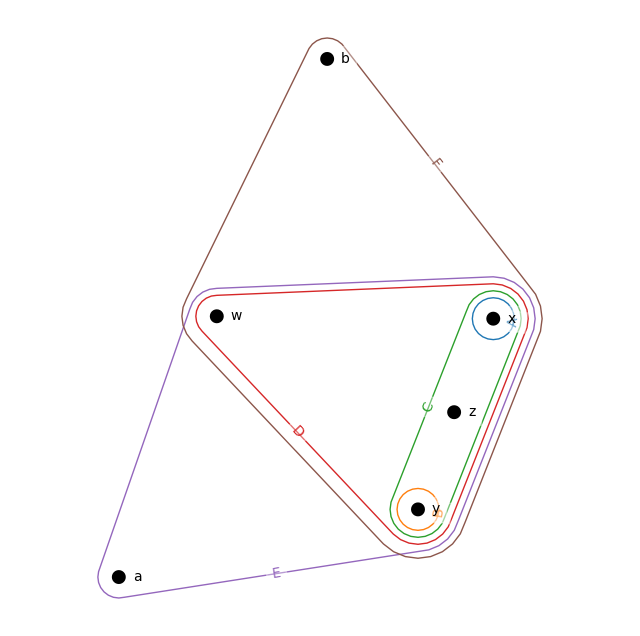

In [10]:
F = { "A": ["x"], "B": ["y"], "C": ["x","y","z",], "D": ["x","y","w",], "E":["x","y","z","w","a"], "F":["x","y","z","w","b"] }
hnxgraph = hnx.Hypergraph(F)
hnx.drawing.draw(hnxgraph)

In [11]:
# convert to a list of edges
G                           =   list( F.values() )
# graph representing the edge containment poset (forgetting direction)
containment                 =   oat.hypergraph.edge_containment_graph_symmetrized( G )
# graph whose edges form the set complement of the containment graph
anticontainment             =   nx.complement( containment )
# adjacency matrix of the anticontainment graph
anti_adjacency              =   nx.adjacency_matrix( anticontainment ).todense()
dissimilarity_matrtix       =   oat.dissimilarity.matrix_from_dense(
                                    dissimilarity_matrix    =   anti_adjacency,
                                    dissimilarity_max       =   0.5
                                )

# factored boundary matrix
factored                    =   oat.rust.FactoredBoundaryMatrixVr(
                                    dissimilarity_matrix    =   dissimilarity_matrtix,
                                    homology_dimension_max  =   2, 
                                )

# print homology
homology        =   factored.homology(
                        return_cycle_representatives    =   True,
                        return_bounding_chains          =   True,
                    )
display(homology)

# print a cycle
cycle                       =   homology["cycle representative"][1]
display(cycle)

# print cycle with reverted vertex labels
remap                       =   { p: k for p,k in enumerate(F.keys()) }
cycle                       =   copy.deepcopy(homology["cycle representative"][1])
cycle["simplex"]            =   [ [remap[x] for x in simplex] for simplex in cycle["simplex"] ]
display(cycle)


/var/folders/n0/_16lj8n53ll89wcvhx1t4g4w0000gn/T/ipykernel_15613/1422724156.py:8: FutureWarning:

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



dimension  birth  death birth simplex death simplex  \
id                                                        
0           0    0.0    inf           [0]          None   
1           2    0.0    inf     [1, 3, 5]          None   

                                 cycle representative  cycle nnz  \
id                                                                 
0     simplex  filtration coefficient
0     [0]   ...          1   
1        simplex  filtration coefficient
0  [1, 3,...          8   

   bounding chain bounding nnz  
id                              
0            None         None  
1            None         None

simplex  filtration coefficient
0  [1, 3, 5]         0.0           1
1  [1, 3, 4]         0.0          -1
2  [1, 2, 5]         0.0          -1
3  [1, 2, 4]         0.0           1
4  [0, 3, 5]         0.0          -1
5  [0, 3, 4]         0.0           1
6  [0, 2, 5]         0.0           1
7  [0, 2, 4]         0.0          -1

simplex  filtration coefficient
0  [B, D, F]         0.0           1
1  [B, D, E]         0.0          -1
2  [B, C, F]         0.0          -1
3  [B, C, E]         0.0           1
4  [A, D, F]         0.0          -1
5  [A, D, E]         0.0           1
6  [A, C, F]         0.0           1
7  [A, C, E]         0.0          -1

In [12]:
triangles   =   homology["cycle representative"][1]["simplex"] # the edges in the cycle
coo         =   oat.plot.hop_mds_from_simplices( triangles.tolist() ) # coordinates generated by MDS

data        =   []
for triangle in triangles:
    trace   =   oat.plot.triangle__trace3d( triangle=triangle, coo=coo )
    label   =   "Simplex " + str( [ remap[x] for x in edge] )
    trace.update( name=label, text=label, opacity=1.0 )
    data.append(trace)

fig = go.Figure(data)
fig.update_layout(height=900, width=900,)
fig.show()



/Users/roek189/anaconda3/envs/oat/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



In [16]:
triangles   =   homology["cycle representative"][1]["simplex"] # the edges in the cycle
coo         =   oat.plot.hop_mds_from_simplices( triangles.tolist() ) # coordinates generated by MDS

data        =   []
for triangle in triangles:
    trace   =   oat.plot.triangle__trace3d( triangle=triangle, coo=coo )
    label   =   "Simplex " + str( [ remap[x] for x in edge] )
    trace.update( name=label, text=label, opacity=1.0, color="grey", )
    data.append(trace)

edges = list(oat.simplex.dnfaces( triangles, facedim=1))
for edge in edges:
    trace   =   oat.plot.edge__trace3d( edge, coo=coo )
    trace.update( showlegend=False, hoverinfo='none', line=dict(width=5, color="white"))
    data.append(trace)    

fig = go.Figure(data)

fig.update_layout( title=dict(text="Octohedron"), width=900, height=800, template="plotly_dark",)
fig.update_layout(scene = dict(     xaxis = dict(showgrid = False,showticklabels = False, ),
                                    yaxis = dict(showgrid = False,showticklabels = False),
                                    zaxis = dict(showgrid = False,showticklabels = False)
             ))

fig.show()



/Users/roek189/anaconda3/envs/oat/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

